# Algorytmy i Struktury Danych

#### Potrzebne importy

 - [matplotlib](https://matplotlib.org/) - wymagana instalacja
    * [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)
 - [timeit](https://docs.python.org/3/library/timeit.html)
 - [numpy](https://numpy.org/) - wymagana instalacja
 - [math](https://docs.python.org/3/library/math.html)
    * [inf](https://en.wikipedia.org/wiki/IEEE_754-1985#Positive_and_negative_infinity)
    * [sqrt](https://en.wikipedia.org/wiki/Square_root)
    * [pi](https://en.wikipedia.org/wiki/Pi_number)
 - [random](https://docs.python.org/3/library/random.html)
 - [collections](https://docs.python.org/3/library/collections.html)
    * [deque](https://docs.python.org/3/library/collections.html#collections.deque)
 - [heapq](https://docs.python.org/3/library/heapq.html)


In [1]:
from matplotlib import pyplot as plt
from timeit import default_timer
import numpy as np
from math import inf, sqrt, pi
from random import random
from collections import deque
from heapq import heapify, heappop, heappush


## [Silnia](https://en.wikipedia.org/wiki/Factorial)

#### Naiwna implementacja rekurencyjna

In [2]:
def factorial1(n):
    if n == 0:
        return 1
    return n * factorial1(n - 1)

#### Dynamiczna implementacja ze słownikiem

In [3]:
def factorial2(n, memory={0:1}):
    if n in memory:
        return memory[n]
    memory[n] = n * factorial2(n - 1)
    return memory[n]

#### Implementacja przez pętlę

Zwróć uwagę, że `range(n)` to wartości $0\ldots(n-1)$, więc musimy je zwiększyć o 1.

In [4]:
def factorial3(n):
    x = 1.0
    for i in range(n):
        x *= i + 1.0
    return x

## [Liczby Fibonacciego](https://en.wikipedia.org/wiki/Fibonacci_number)

#### Naiwna implementacja rekurencyjna

Uwaga, bardzo szybko rośnie złożoność i może zadławić się dla $n \sim 40$

In [5]:
def Fib1(n):
    if n == 0 or n == 1:
        return n
    return Fib1(n - 1) + Fib1(n - 2)

#### Dynamiczna implementacja ze słownikiem

In [6]:
def fib(n, memory={0:0, 1:1}):
    if n in memory:
        return memory[n]
    else:
        memory[n] = fib(n - 1) + fib(n - 2)
        return memory[n]

#### Implementacja przez pętlę

In [7]:
def fib(n: int):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a+b
    return a

## Algorytmy naiwne

#### [Sortowanie przez wybieranie](https://en.wikipedia.org/wiki/Selection_sort)

Złożoność czasowa $O(n^2)$

`np.argmin` zwróci nam indeks minimum licząc od `i`-tego elementu, dlatego dodajemy `i`.

In [8]:
def selectSort(L):
    for i in range(len(L)):
        j = np.argmin(L[i:]) + i
        L[i], L[j] = L[j], L[i]

#### [Sortowanie przez wstawianie](https://en.wikipedia.org/wiki/Insertion_sort)

Złożoność czasowa $O(n^2)$

In [9]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

#### [Sortowanie przez zliczanie](https://en.wikipedia.org/wiki/Counting_sort)

Złożoność czasowa i pamięciowa $O(n + k)$, gdzie $k$ to `upper_bound - lower_bound + 1`.

In [10]:
def countingSort(arr, lower_bound, upper_bound):
    buckets = [0 for _ in range(lower_bound, upper_bound + 1)]
    arr_cpy = [0 for _ in arr]
    for e in arr:
        if e != upper_bound:
            buckets[e - lower_bound + 1] += 1
    for i in range(1, upper_bound - lower_bound + 1):
        buckets[i] += buckets[i - 1]
    for e in arr:
        arr_cpy[buckets[e - lower_bound]] = e
        buckets[e - lower_bound] += 1
    for i in range(len(arr)):
        arr[i] = arr_cpy[i]


## [Dziel i zwyciężaj](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm)

### [Wyszukiwanie binarne](https://en.wikipedia.org/wiki/Binary_search_algorithm)

Zakładając, że `L` jest posortowana możemy znaleźć w niej wartość `value` w czasie $O(\log{n})$. W przypadku, gdy `value` nie znajduje się w `L` zwracamy `None`.

In [11]:
def binSearch(L, value):
    a, b = 0, len(L) - 1
    while a < b - 1:
        c = (a + b) // 2
        if value < L[c]:
            b = c
        elif value > L[c]:
            a = c
        else:
            return c
    if L[a] == value:
        return a
    elif L[b] == value:
        return b
    else:
        return None

### Sortowanie

#### Merge sorted lists

Złożoność czasowa $O(n)$

Na koniec albo `A` albo `B` jest pusta, więc `result + A + B` zwróci nam rezultat z resztą pozostałej listy na końcu.

In [12]:
def merge(A, B):
    result = []
    i, j = 0, 0
    while i < len(A) and j < len(B):
        if A[i] < B[j]:
            result.append(A[i])
            i += 1
        else:
            result.append(B[j])
            j += 1
    return result + A[i:] + B[j:]

#### Split in half

Złożoność czasowa $O(n)$

In [13]:
def splitInHalf(L):
    l = len(L) // 2
    return L[:l], L[l:]

#### Split by first element

Złożoność czasowa $O(n)$

In [14]:
def splitByFirst(L):
    first = L[0]
    A, B = [], []
    for element in L[1:]:
        if element < first:
            A.append(element)
        else:
            B.append(element)
    if len(A) == 0:
        A.append(first)
    else:
        B.append(first)
    return A, B

#### [MergeSort](https://en.wikipedia.org/wiki/Merge_sort)

Złożoność czasowa $O(\log{n} \cdot (n + n)) \equiv O(n\log{n})$

Złożoność pamięciowa $O(n\log{n})$, da się $O(n)$

In [15]:
def mergeSort(L):
    if len(L) > 1:
        A, B = splitInHalf(L)
        return merge(mergeSort(A), mergeSort(B))
    else:
        return L

#### Merge sort bez rekurencji

In [16]:
def loopMergeSort(L):
    n = len(L)
    Ls = [[x] for x in L]
    while len(Ls) > 1:
        Ls2 = []
        for i in range(0, len(Ls) - 1, 2):
            Ls2.append(merge(Ls[i], Ls[i + 1]))
        if len(Ls) %2 == 1:
            Ls2.append(Ls[-1])
        Ls = Ls2
    return [x for l in Ls for x in l]

#### [QuickSort](https://en.wikipedia.org/wiki/Quicksort)

Napisany naiwnie, normalnie powinien być in-place. Złożoność czasowa $O(n^2)$

Złożoność pamięciowa powinna być $O(1)$, tutaj jest $O(n\log{n})$

In [17]:
def quickSort(L):
    if len(L) > 1:
        A, B = splitByFirst(L)
        return quickSort(A) + quickSort(B)
    else:
        return L

Alternatywne implementacje quick sort, delikatniej szybsze.

In [18]:
def quickSort2(a):
    if len(a) <= 1:
        return a
    else:
        q = a[0]
        l, m, r = [], [], []
        for elem in a:
            if elem < q:
                l.append(elem)
            elif elem > q:
                r.append(elem)
            else:
                m.append(elem)
        return quickSort2(l) + m + quickSort2(r)

In [19]:
def quickSort3(lst):
    if len(lst) <= 1:
        return lst
    mid = lst[len(lst) // 2]
    lewa = [x for x in lst if x < mid]
    middle = [x for x in lst if x == mid]
    prawa = [x for x in lst if x > mid]

    return quickSort3(lewa) + middle + quickSort3(prawa)

#### Porównanie

`sst` - select sort times - select sort sortuje in-place, co oznacza, że lista `l` będzie posortowana. Dlatego przygotowujemy oddzielnie `npl` (numpy list), którą rzutujemy na standardową listę pythonową dla każdego algorytmu do posortowania.

`mst` - merge sort times

`lmst` - loop merge sort times - merge sort bez rekurencji

`qst` - quick sort times

`pst` - [python standard](https://docs.python.org/3/howto/sorting.html) sort times - sorted jest funkcją leniwą, co oznacza, że zwraca nam jedynie przepis na sortowanie listy. Sama lista zostanie posortowana dopiero wtedy, gdy będziemy się odwoływali do jej elementów. Rzutowanie na `list` wystarcza do "zgorliwienia".

`nst` - [numpy sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) times

In [20]:
sst = []
mst = []
lmst = []
qst = []
qst2 = []
qst3 = []
pst = []
nst = []

ns = range(0,10000,1000)

for n in ns:
    npl = np.random.random(n)
    l = list(npl)
    start = default_timer()
    selectSort(l)
    sst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    mergeSort(l)
    mst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    loopMergeSort(l)
    lmst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort(l)
    qst.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort2(l)
    qst2.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    quickSort3(l)
    qst3.append(default_timer() - start)

    l = list(npl)
    start = default_timer()
    list(sorted(l))
    pst.append(default_timer() - start)

    start = default_timer()
    np.sort(npl)
    nst.append(default_timer() - start)


Żeby zobaczyć porównanie algorytmów bez `select sort` w lepszej rozdzielczości, zakomentuj pierwszą linijkę.

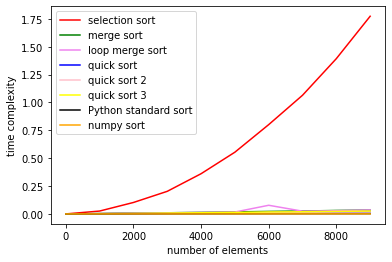

In [21]:
plt.plot(ns, sst, 'r', label='selection sort')
plt.plot(ns, mst, 'g', label='merge sort')
plt.plot(ns, lmst, 'violet', label='loop merge sort')
plt.plot(ns, qst, 'b', label='quick sort')
plt.plot(ns, qst2, 'pink', label='quick sort 2')
plt.plot(ns, qst3, 'yellow', label='quick sort 3')
plt.plot(ns, pst, 'black', label='Python standard sort')
plt.plot(ns, nst, 'orange', label='numpy sort')
plt.legend(loc="upper left")
plt.xlabel('number of elements')
plt.ylabel('time complexity')
plt.show()

### [Szybkie potęgowanie](https://en.wikipedia.org/wiki/Exponentiation_by_squaring)

Złożoność czasowa $O(\log{n})$

In [22]:
def fastPower(a, n):
    result = 1
    while n > 0:
        if n % 2 == 1:
            result *= a
        n //= 2
        a *= a
    return result

## Szybki Fibonacci

$$\begin{pmatrix}a & b\\ c & d\end{pmatrix} \cdot \begin{pmatrix}e & f\\ g & h\end{pmatrix} = \begin{pmatrix}ae + bg & af + bh \\ ce + dg & cf + dh\end{pmatrix}$$

`a, b, c, d` odpowiada macierzy $ \begin{pmatrix}a & b\\ c & d\end{pmatrix} $.

In [23]:
def matMul(A, B):
    a, b, c, d = A
    e, f, g, h = B
    return a * e + b * g, a * f + b * h, c * e + d * g, c * f + d * h

In [24]:
def fastMatPower(M, n):
    result = 1, 0, 0, 1
    while n > 0:
        if n % 2 == 1:
            result = matMul(result, M)
        n //= 2
        M = matMul(M, M)
    return result

$$ \begin{pmatrix} F_{n + 2} & F_{n + 1} \\ F_{n + 1} & F_n \end{pmatrix} \cdot \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}^k = \begin{pmatrix} F_{n + 2 + k} & F_{n + 1 + k} \\ F_{n + 1 + k} & F_{n + k} \end{pmatrix} $$

$$ \begin{pmatrix} F_1 & F_0 \\ F_0 & F_{-1} \end{pmatrix} \cdot \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}^k = \begin{pmatrix} F_{1 + k} & F_k \\ F_k & F_{k - 1} \end{pmatrix} $$

$$ \begin{pmatrix} F_1 & F_0 \\ F_0 & F_{-1} \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $$

In [25]:
def fastFibonacci(n):
    M = 1, 1, 1, 0
    _, b, _, _ = fastMatPower(M, n)
    return b

In [26]:
def fastNumpyFibonacci(n):
    return np.linalg.matrix_power(np.array([[1, 1], [1, 0]]), n)[0,1]

## [Algorytmy zachłanne](https://en.wikipedia.org/wiki/Greedy_algorithm)

#### [Problem komiwojażera](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

Rozwiązanie zachłanne $O(n^3)$

`N` - liczba miast

`towns` - losujemy współrzędne dla miast

`best_cost` - najlepszy jak dotąd koszt (suma kwadratów odległości) ścieżki. Domyślnie $\infty$ by dowolna ścieżka była lepsza od domyślnej.

`best_path` - najlepsza dotąd znaleziona ścieżka

Dla każdego miasta rozpatrujemy ścieżkę rozpoczynającą się z niego. Mając miasto znajdźmy mu najbliższe, to jest takie, że kwadrat odległości $(x_1 - x_2)^2 + (y_1 - y_2)^2$ był jak najmniejszy. Żeby nie rozpatrywać już miast odwiedzonych nadpisujemy je wartością $\infty$. Po znalezieniu najbliższego miasta szukamy kolejnego zaczynając od niego.

Dla każdego miasta sprawdzamy, czy nasza aktualna ścieżka nie jest lepsza od dotychczasowej najlepszej. Jeśli tak, to zapamiętujemy ją.

In [27]:
N = 1000

towns = np.random.random((N, 2))

best_cost = inf
best_path = []

for i in range(len(towns)):
    xs = np.copy(towns[:,0])
    ys = np.copy(towns[:,1])
    path = [i]
    cost = 0.0
    current = i
    for j in range(len(towns) - 1):
        x = xs[current]
        y = ys[current]
        xs[current] = ys[current] = inf
        dists = (xs - x) ** 2.0 + (ys - y) ** 2
        current = np.argmin(dists)
        path.append(current)
        cost += np.sqrt(dists[current])
    if cost < best_cost:
        best_path = path
        best_cost = cost

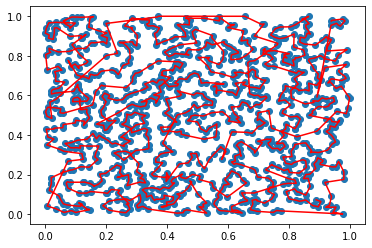

In [28]:
xs = towns[:,0]
ys = towns[:,1]
xs = xs[best_path]
ys = ys[best_path]

plt.plot(xs, ys, 'r')
plt.scatter(xs, ys)
plt.show()

#### Rozwiązanie bez numpy

Tworzymy dwie tablice losowych współrzędnych `x` i `y`. Wybieramy początkowe miasto (`current`) i wyznaczamy odległości do innych miast. Żeby nie uwzględniać tego miasta zastępujemy jego współrzędne przez $\left(\infty,\infty\right)$. Wybieramy miasto, które jest najbliżej naszego.

In [29]:
N = 200

xs = [random() for i in range(N)]
ys = [random() for i in range(N)]

old_xs = list(xs)
old_ys = list(ys)

In [30]:
current = 3

x, y = xs[current], ys[current]
xs[current], ys[current] = inf, inf

dists = []
for i in range(N):
    dists.append((x - xs[i]) ** 2. + (y - ys[i]) ** 2.)
dists.index(min(dists))

155

Zamiast wyznaczać pojedyńcze najbliższe miasto stwórzmy teraz pętlę, która będzie dla każdego kolejnego miasta wyznaczała jego najbliższego sąsiada niebędącego miastem, które już odwiedziliśmy. Żeby ignorować miasta, w których już byliśmy zamieniamy ich współrzędne na $\left( \infty, \infty \right)$. Ścieżka rozpoczyna się miastem `current`.

In [31]:
current = 3
path = [current]

for j in range(N - 1):
    x, y = xs[current], ys[current]
    xs[current], ys[current] = inf, inf

    dists = []
    for i in range(N):
        dists.append((x - xs[i]) ** 2. + (y - ys[i]) ** 2.)
    current = dists.index(min(dists))
    path.append(current)


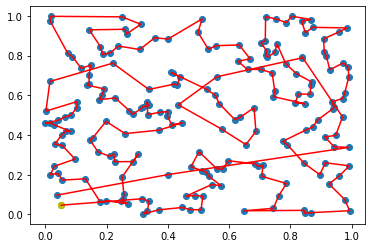

In [32]:
nxs = [old_xs[i] for i in path]
nys = [old_ys[i] for i in path]
fsx, fsy = old_xs[path[0]], old_ys[path[0]]


plt.plot(nxs, nys, 'r')
plt.scatter(nxs, nys)
plt.scatter([fsx], [fsy], c='y')
plt.show()

Wyznaczmy teraz najlepsze trasy dla każdego miasta jako początku. Porównujmy koszt każdej ścieżki z aktualną najlepszą, jeśli nasz koszt jest niższy, to podmieńmy koszt i ścieżkę.

In [33]:
best_cost = inf

best_path = []

for current in range(N):

    path = [current]
    cost = 0
    xs = list(old_xs)
    ys = list(old_ys)

    for j in range(N - 1):
        x, y = xs[current], ys[current]
        xs[current], ys[current] = inf, inf

        dists = []
        for i in range(N):
            dists.append(sqrt((x - xs[i]) ** 2. + (y - ys[i]) ** 2.))
        current = dists.index(min(dists))
        cost += min(dists)
        path.append(current)
    if (cost < best_cost):
        best_path = path
        best_cost = cost



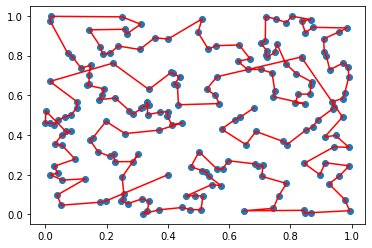

In [34]:
nxs = [old_xs[i] for i in best_path]
nys = [old_ys[i] for i in best_path]

plt.plot(nxs, nys, 'r')
plt.scatter(nxs, nys)
plt.show()

## [Metoda Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method)

#### Wyznaczanie [$\pi$](https://en.wikipedia.org/wiki/Pi)

Wylosuj `N` punktów na obszarze kwadratu $\left[ 0 \ldots 1, 0 \ldots 1 \right]$. Pole kwadratu to $r^2$, gdzie $r=1$, czyli $1$. Pole koła w nim zawartej to $\frac{\pi r^2}{4}$. Stąd $\frac{\pi}{4}$ to stosunek powierzchni koła do kwadratu, a więc i prawdopodobieństwo trafienia w ćwiartkę losowymi punktami.

In [35]:
N = 1000000
xs = [random() for i in range(N)]
ys = [random() for i in range(N)]

inCircle = [xs[i] ** 2. + ys[i] ** 2. <= 1.0 for i in range(N)]
4 * sum(inCircle) / N, pi

(3.142588, 3.141592653589793)

## [Kolekcje](https://en.wikipedia.org/wiki/Collection_(abstract_data_type))

Podstawowymi operacjami, których powinniśmy spodziewać się po kolekcjach jest dodanie elementu (`add`, `append`, `insert`, `push`, `enque`), usunięcie elementu (`delete`, `remove`, `pop`), sprawdzenie, czy element znajduje się w kolekcji (`contains`, `find`, `exists`, `in`), pobranie wartości elementu (`get`) i ustawienie wartości elementu (`set`).

#### [Tablice/listy/wektory](https://en.wikipedia.org/wiki/Array_data_structure)

In [36]:
display([1, 2, 3, 4])
display([])
display([1, 2.0, "Ala ma kota"])
display(list())
display(list("Ala ma kota"))
display([[], [1, 2], [[], [1, 2, 3]]])

[1, 2, 3, 4]

[]

[1, 2.0, 'Ala ma kota']

[]

['A', 'l', 'a', ' ', 'm', 'a', ' ', 'k', 'o', 't', 'a']

[[], [1, 2], [[], [1, 2, 3]]]

Operacja dodania na koniec tablicy działa w czasie $O(1)$. Co jakiś czas tablica musi zostać przealokowana i operacja ta zajmuje $O(n)$, wykonujemy ją jednak rzadko i złożoność ta amortyzuje się do $O(1)$.

Operacja dodania na początku tablicy działa w czasie $O(n)$ ponieważ musimy przesunąć wszystkie następne elementy o $1$ do przodu. Operacja dodania na $i$-tą pozycję działa w czasie $O(n - i)$.

Operacja usunięcia z końca tablicy działa w czasie $O(1)$, z początku zaś w czasie $O(n)$ ponieważ musimy przesunąć wszystkie następujące elementy o $1$ wstecz. Usunięcie z $i$-tej pozycji wykonuje się w czasie $O(n - i)$.

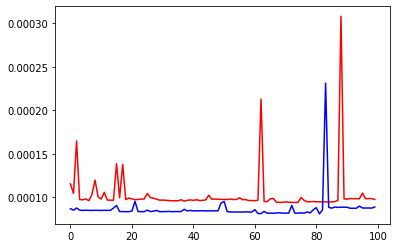

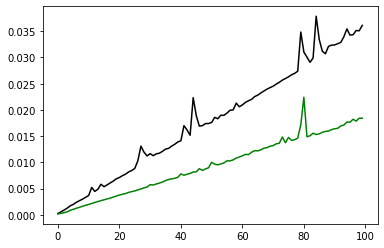

In [37]:
N = 100
batchsize = 1000
l = []
appTimes = []
popTimes = []
insTimes = []
zpopTimes = []

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.append(i)
    appTimes.append(default_timer() - start)

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.pop()
    popTimes.append(default_timer() - start)

popTimes.reverse()

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.insert(0, i)
    insTimes.append(default_timer() - start)

for i in range(N):
    start = default_timer()
    for j in range(batchsize):
        l.pop(0)
    zpopTimes.append(default_timer() - start)

zpopTimes.reverse()

plt.plot(appTimes, 'r')
plt.plot(popTimes, 'b')
plt.show()
plt.plot(insTimes, 'k')
plt.plot(zpopTimes, 'g')
plt.show()

#### Wektory w numpy

Wektory w `numpy`, w przeciwieństwie do standardowego `list` w pythonie, nie są tablicami wskaźników a ciągiem danych. Stąd typ danych musi być określony explicite w momencie tworzenia wektora. Tekst będzie reprezentowany przez typ `<Un`, gdzie `n` jest długością tekstu, wielotypowa tablica będzie tablicą typu `object`. Możemy tworzyć tablice wielowymiarowe, acz muszą one składać się z podtablic o tej samej długości i typie.

`ndarray` jest statycznego rozmiaru i dodanie nowego elementu tworzy nowy, niezależny wektor.

In [38]:
display(np.array("Ala ma kota"))
display(np.array([1, 2, 3]))
display(np.array([1, 2, 3.]))
display(np.array([[1], [2], [3.]]))
display(np.array([[1], [2], [3., 4]]))
display(np.array([1, 2, []]))

array('Ala ma kota', dtype='<U11')

array([1, 2, 3])

array([1., 2., 3.])

array([[1.],
       [2.],
       [3.]])

C:\Users\micha\AppData\Local\Temp/ipykernel_576/3882512325.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  display(np.array([[1], [2], [3., 4]]))


array([list([1]), list([2]), list([3.0, 4])], dtype=object)

C:\Users\micha\AppData\Local\Temp/ipykernel_576/3882512325.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  display(np.array([1, 2, []]))


array([1, 2, list([])], dtype=object)

#### Porównanie list vs np.ndarray

##### [map](https://en.wikipedia.org/wiki/Map_(mathematics))

Wykres z logarytmiczną osią pionową.

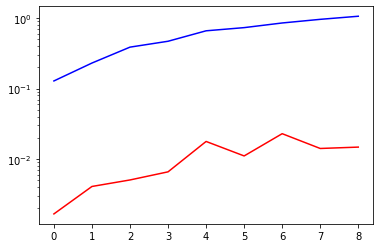

In [39]:
ns = range(1000000, 10000000, 1000000)

nptimes = []
sttimes = []

for n in ns:
    npl = np.random.random(n)
    l = list(npl)

    start = default_timer()
    npl * 2.0
    nptimes.append(default_timer() - start)

    start = default_timer()
    list(map(lambda x: 2.0 * x, l))
    sttimes.append(default_timer() - start)

plt.plot(nptimes, 'r')
plt.plot(sttimes, 'b')
plt.yscale('log')
plt.show()

##### `in`

In [40]:
npl = np.random.random(1000000)
l = list(npl)

start = default_timer()
-1 in npl
print(default_timer() - start)

start = default_timer()
-1 in l
print(default_timer() - start)

0.0009316000000012536
0.1286763000000022


#### [Kolejka](https://en.wikipedia.org/wiki/Queue_(abstract_data_type))

Struktura [FIFO](https://en.wikipedia.org/wiki/FIFO_(computing_and_electronics)) (First In First Out).

Dodawanie na koniec jak i na początek w czasie $O(1)$. Usuwanie z początku jak i z końca w czasie $O(1)$. Dodawanie i usuwanie ze środka za pomocą `append` i `pop` w czasie $O(n - i)$ a za pomocą `appendleft` i `popleft` w czasie $O(i)$.


Wykresy przedstawiają czas od rozpoczęcia pętli, oznacza to, że jeśli wykres jest liniowy, to operacja jest w czasie stałym, bo po $n$ krokach wykonaliśmy $O(n)$ operacji, czyli średnio stałą liczbę operacji na krok. Zauważ, że operacje `pop` i `popleft` są szybsze od `append` i `appendleft`.

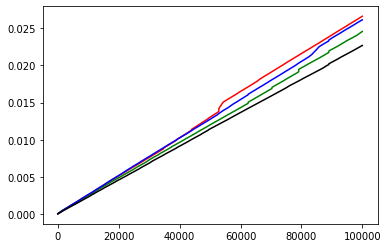

In [41]:
N = 100000
q = deque()
times = []

start = default_timer()
for i in range(N):
    q.append(i)
    times.append(default_timer() - start)

plt.plot(times, 'r')

times = []

start = default_timer()
for i in range(N):
    q.pop()
    times.append(default_timer() - start)

plt.plot(times, 'g')

q = deque()
times = []

start = default_timer()
for i in range(N):
    q.appendleft(i)
    times.append(default_timer() - start)

plt.plot(times, 'b')

times = []

start = default_timer()
for i in range(N):
    q.popleft()
    times.append(default_timer() - start)

plt.plot(times, 'k')


Operacje `append` i `pop` na liście i na kolejce działają w podobnym czasie.

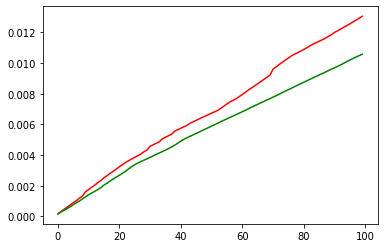

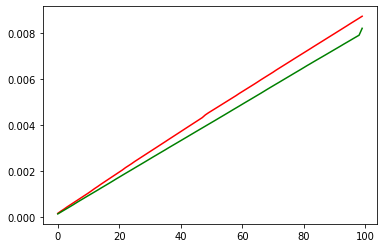

In [42]:
N = 100
batchsize = 1000

l = []
ltimes = []
q = deque()
qtimes = []

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        l.append(i)
    ltimes.append(default_timer() - start)

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        q.append(i)
    qtimes.append(default_timer() - start)

plt.plot(ltimes, 'r')
plt.plot(qtimes, 'g')
plt.show()

ltimes = []
qtimes = []

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        l.pop()
    ltimes.append(default_timer() - start)

start = default_timer()
for i in range(N):
    for j in range(batchsize):
        q.pop()
    qtimes.append(default_timer() - start)

plt.plot(ltimes, 'r')
plt.plot(qtimes, 'g')
plt.show()



#### [Listy linkowane/wiązane](https://en.wikipedia.org/wiki/Linked_list)

Lista składa się z węzłów zawierających wartość i wskaźnik na kolejny węzeł (lub `None`, gdy jest to ostatni węzeł). Obiekt listy zawiera referencję do głowy.

In [43]:
class Node:
    def __init__(self, value, next = None) -> None:
        self.value = value
        self.next = next

    def isLast(self):
        return self.next == None

class LinkedList:
    def __init__(self, head = None):
        self.head = head

    def insert(self, index, value):
        if index == 0:
            self.head = Node(value, self.head)
        else:
            current = self.head
            for _ in range(index - 1):
                current = self.next
            current.next = Node(value, current.next)

    def remove(self, index):
        if index == 0:
            self.head = self.head.next
        else:
            current = self.head
            for _ in range(index - 1):
                current = self.next
            current.next = current.next.next

    def get(self, index):
        current = self.head
        for _ in range(index):
            current = current.next
        return current.value

    def set(self, index, value):
        current = self.head
        for _ in range(index):
            current = current.next
        current.value = value

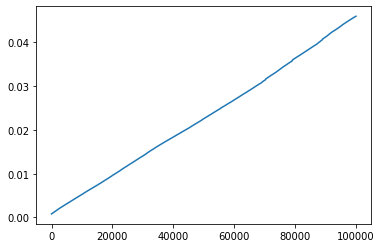

In [44]:
l = np.random.random(100000)
s = set(l)
times = []
start = default_timer()
c = 0
for i in np.random.random(100000):
    c += i in s
    times.append(default_timer() - start)

plt.plot(times)
plt.show()

In [45]:
l = []
s = set([])

c = 0
start = default_timer()
for i in range(100000):
    l.append(i)
print(default_timer() - start)

c = 0
start = default_timer()
for i in range(100000):
    s.add(i)
print(default_timer() - start)

0.011063200000002382
0.012845200000001


#### [Kolejka priorytetowa](https://en.wikipedia.org/wiki/Priority_queue)

Struktura działająca na bazie [kopca](https://en.wikipedia.org/wiki/Heap_(data_structure)). W korzeniu kopca utrzymywane jest minimum (dla min-kopców, maksimum dla max-kopców). Dodawanie nowego elementu (`heappush`) polega na podczepieniu na końcu kopca i pchaniu do góry aż do znalezienia miejsca, gdzie nie zaburzamy porządku. Operacja ta działa pesymistycznie w czasie $O(\log{n})$. Usuwanie z kopca (`heappop`) zwraca minimum (lub maksimum) i w jego miejsce wstawia kolejne. Operacja ta działa pesymistycznie w czasie $O(\log{n})$.

Kopce można tworzyć za pomocą operacji `heapify` w czasie $O(n)$.

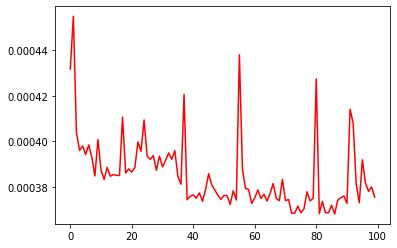

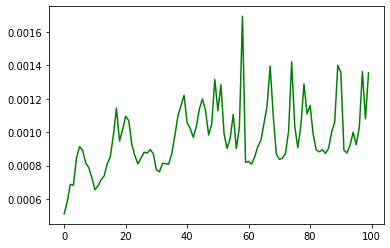

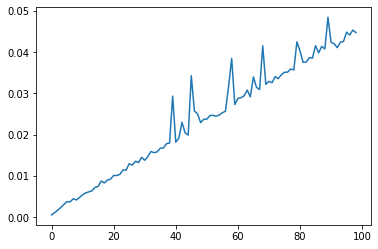

In [46]:
l = np.random.random(100000)

h = []

times = []
counter = 0
for e in l:
    if counter % 1000 == 0:
        start = default_timer()
    heappush(h, e)
    if counter % 1000 == 999:
        times.append(default_timer() - start)
    counter += 1

plt.plot(times, 'r')
plt.show()
times = []

while h:
    if counter % 1000 == 0:
        start = default_timer()
    heappop(h)
    if counter % 1000 == 999:
        times.append(default_timer() - start)
    counter += 1

times.reverse()
plt.plot(times, 'g')
plt.show()

times = []
for i in range(10000, 1000000, 10000):
    l = list(np.random.random(i))
    start = default_timer()
    heapify(l)
    times.append(default_timer() - start)

plt.plot(times)
plt.show()

#### [Binary Search Tree](https://en.wikipedia.org/wiki/Binary_search_tree)

In [47]:
class BSTNode:
    def __init__(self, value, level) -> None:
        self. value = value
        self.level = level
        self.lesser = None
        self.greater = None

    def __str__(self) -> str:
        return f"({self.lesser}) / {self.value} \\ ({self.greater})"

    def plot(self):
        if self.lesser:
            plt.plot([self.value, self.lesser.value], [self.level, self.lesser.level])
            self.lesser.plot()
        if self.greater:
            plt.plot([self.value, self.greater.value], [self.level, self.greater.level])
            self.greater.plot()

class BST:
    def __init__(self) -> None:
        self.root = None

    def add(self, value):
        if not self.root:
            self.root = BSTNode(value, 0)
        else:
            current = self.root
            while True:
                if value < current.value:
                    if current.lesser:
                        current = current.lesser
                    else:
                        current.lesser = BSTNode(value, current.level + 1)
                        return
                elif value > current.value:
                    if current.greater:
                        current = current.greater
                    else:
                        current.greater = BSTNode(value, current.level + 1)
                        return
                else:
                    return

    def contains(self, value):
        current = self.root
        while current:
            if current.value == value:
                return True
            elif current.value < value:
                current = current.greater
            else:
                current = current.lesser
        return False


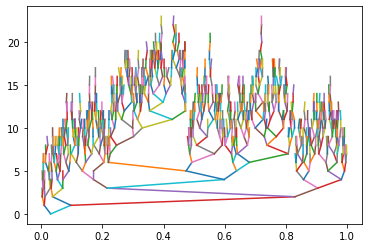

In [48]:
bst = BST()

l = np.random.random(1000)

for i in l:
    bst.add(i)

bst.root.plot()
plt.show()


## Algorytmy przeszukiwania

In [49]:
class TreeNode:
    def __init__(self, value, children) -> None:
        self.value = value
        self.children = children

    def __str__(self) -> str:
        return f"{self.value}"

In [50]:
tree = TreeNode((1,1), [
    TreeNode((2,2), [
        TreeNode((3,3), [
            TreeNode((4,4), [])
        ])
    ]),
    TreeNode((5,2), []),
    TreeNode((6,2), [
        TreeNode((7,3), []),
        TreeNode((8,3), [
            TreeNode((9,4), [])
        ])
    ])
])

#### [Przeszukiwanie wszerz](https://en.wikipedia.org/wiki/Breadth-first_search)

Chcemy przejść po drzewie i wykonać funkcję `f` na wierzchołkach poziom po poziomie.

In [51]:
def BFS(f, root):
    q = deque([root])
    while q:
        current = q.popleft()
        q.extend(current.children)
        f(current)

In [52]:
BFS(print, tree)

(1, 1)
(2, 2)
(5, 2)
(6, 2)
(3, 3)
(7, 3)
(8, 3)
(4, 4)
(9, 4)


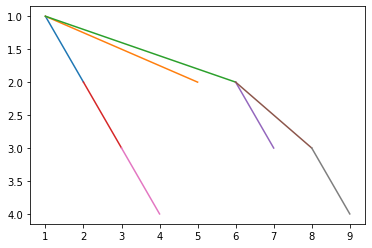

In [53]:
def plotBranches(node):
    x, y = node.value
    for child in node.children:
        xc, yc = child.value
        plt.plot([x, xc], [y, yc])

ax = plt.gca()
ax.invert_yaxis()
BFS(plotBranches, tree)
plt.show()

#### [Przeszukiwanie wgłąb](https://en.wikipedia.org/wiki/Depth-first_search)

Chcemy przejść po drzewie zagłębiając się w kolejne gałęzie aż dojdziemy do dna, wykonując na wszystkich węzłach po drodze funkcję `f`.

In [54]:
def DFS(f, root):
    stack = [root]
    while stack:
        current = stack.pop()
        stack.extend(reversed(current.children))
        f(current)

In [55]:
DFS(print, tree)

(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 2)
(6, 2)
(7, 3)
(8, 3)
(9, 4)


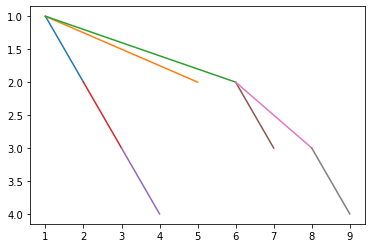

In [56]:
ax = plt.gca()
ax.invert_yaxis()
DFS(plotBranches, tree)
plt.show()

In [57]:
def recDFS(f, root):
    f(root)
    for child in root.children:
        recDFS(f, child)

In [58]:
recDFS(print, tree)

(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 2)
(6, 2)
(7, 3)
(8, 3)
(9, 4)


## [Minimalne drzewo rozpinające](https://en.wikipedia.org/wiki/Minimum_spanning_tree)

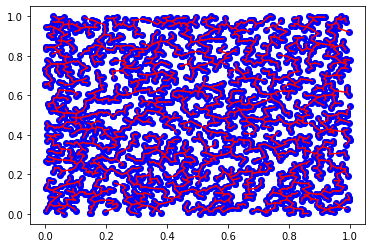

In [59]:
N = 2000
xs = np.random.random(N)
ys = np.random.random(N)

def distSquare(i, j):
    return (xs[i] - xs[j]) ** 2 + (ys[i] - ys[j]) ** 2

dists = [(i, j, distSquare(i, j)) for i in range(N) for j in range(N) if i < j]

dists.sort(key=(lambda x: x[2]))

MST = []
heads = {i: i for i in range(N)}

def getHead(i):
    if heads[i] == i:
        return i
    else:
        heads[i] = getHead(heads[i])
        return heads[i]

for (i, j, _) in dists:
    headi, headj = getHead(i), getHead(j)
    if headi != headj:
        MST.append((i, j))
        heads[headi] = headj

for (i, j) in MST:
    plt.scatter([xs[i], xs[j]], [ys[i], ys[j]], c='b')

for (i, j) in MST:
    plt.plot([xs[i], xs[j]], [ys[i], ys[j]], 'r')


plt.show()


In [60]:
N = 20
xs = np.random.random(N)
ys = np.random.random(N)

def distSquare(i, j):
    return (xs[i] - xs[j]) ** 2 + (ys[i] - ys[j]) ** 2

dists = [(i, j, distSquare(i, j)) for i in range(N) for j in range(N) if i < j]

dists.sort(key=(lambda x: x[2]))

MST = []
nMST = []
heads = {i: i for i in range(N)}

def getHead(i):
    if heads[i] == i:
        return i
    else:
        heads[i] = getHead(heads[i])
        return heads[i]

k = 0

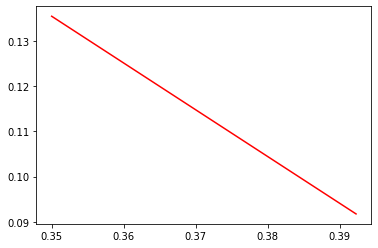

In [61]:
(i, j, _) = dists[k]
headi, headj = getHead(i), getHead(j)
if headi != headj:
    MST.append((i, j))
    heads[headi] = headj
else:
    nMST.append((i, j))
k += 1

for (i, j) in MST:
    plt.plot([xs[i], xs[j]], [ys[i], ys[j]], 'r')

for (i, j) in nMST:
    plt.plot([xs[i], xs[j]], [ys[i], ys[j]], 'g')


plt.show()